In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated

In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:

#test_datafile = directory +'/aerosol_data/raw_data/pre_log_ts-0.2_P11_wl-532/test_dataset.hdf5'


test_datafile = directory +'/aerosol_data/raw_data/pre_log_ts-0.2_P11_wl-532_sc-None_switched/test_dataset.hdf5'

In [5]:
model_name = 'forward_model'


In [6]:
model_dir = directory +'/aerosol_results/simulated_data/models/models_switched'

In [7]:
#plot_dir = f'../plots/models/{model_name}'
plot_dir = directory +'/aerosol_results/simulated_data/forward_model9/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [8]:
model_name

'forward_model'

# Load the model and the data

In [9]:
custom_objects = {
    'AdjustedRSquared': AdjustedRSquared,
}

kwargs = {
    'custom_objects': custom_objects,
    'compile': False,
}

surr = KerasSurrogate.load(model_dir, model_name, model_kwargs=kwargs)
#import tensorflow as tf
#tf.keras.backend.set_floatx('float32')
#surr = KerasSurrogate.load(model_dir, model_name)

In [10]:
dir(surr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_surrogate',
 '_fit_model',
 '_load_model',
 '_model',
 '_name',
 '_predict_model',
 '_save_model',
 '_version',
 'details',
 'fit',
 'load',
 'model',
 'name',
 'predict',
 'preprocessor_x',
 'preprocessor_y',
 'save',
 'version']

In [11]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')

dvar = pd.read_hdf(datafile, key='dvar')
qoi = pd.read_hdf(datafile, key='qoi')

n_in = dvar.shape[1]

dvar_trainval, dvar_test, qoi_trainval, qoi_test = train_test_split(dvar,
                                                                    qoi,
                                                                    test_size=0.2)
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

dvar_trainval.reset_index(drop=True, inplace=True)
qoi_trainval.reset_index(drop=True, inplace=True)

kf = KFold(n_splits=5, random_state=76, shuffle=True)

train_ind, val_ind = next(kf.split(dvar_trainval))

dvar_train = dvar_trainval.values[train_ind]
dvar_val = dvar_trainval.values[val_ind]
qoi_train = qoi_trainval.values[train_ind]
qoi_val = qoi_trainval.values[val_ind]

In [12]:
surr.evaluate(dvar_test,qoi_test)

AttributeError: 'KerasSurrogate' object has no attribute 'evaluate'

In [13]:
dvar_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
75721   -15.346368   -15.647405   -15.970624   -16.311292   -16.653436   
80184   -16.014276   -16.163742   -16.331920   -16.516203   -16.713155   
19864   -15.012475   -15.523168   -16.036147   -16.531054   -16.993892   
76699   -15.110576   -15.127886   -15.148264   -15.171547   -15.197773   
92991   -15.174501   -15.305256   -15.452063   -15.612544   -15.783912   
...            ...          ...          ...          ...          ...   
32595   -14.684202   -15.030477   -15.398550   -15.783268   -16.160502   
29313   -15.173373   -15.617139   -16.067307   -16.508342   -16.909186   
37862   -15.379258   -15.411835   -15.449856   -15.493067   -15.541145   
53421   -14.784675   -15.078137   -15.392046   -15.719185   -16.045682   
42410   -15.515366   -16.027250   -16.539644   -17.031266   -17.492659   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
75721    -16.991183    -17.330672    -17.640897    -17.953306    -18.235696   
80184    -16.921192    -17.137610    -17.357178    -17.592391    -17.812220   
19864    -17.371364    -17.737432    -18.033515    -18.265816    -18.461357   
76699    -15.226795    -15.258587    -15.293043    -15.331595    -15.369561   
92991    -15.964517    -16.152045    -16.342427    -16.546712    -16.736172   
...             ...           ...           ...           ...           ...   
32595    -16.518349    -16.876763    -17.199644    -17.509242    -17.786276   
29313    -17.247239    -17.559565    -17.813364    -17.990783    -18.156242   
37862    -15.593900    -15.650971    -15.712164    -15.780053    -15.845553   
53421    -16.366749    -16.678024    -16.959743    -17.213962    -17.454191   
42410    -17.866221    -18.232874    -18.537709    -18.784121    -18.989895   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
75721  ...     -23.110124     -23.113011     -23.136928     -23.184647   
80184  ...     -23.459839     -23.464077     -23.464821     -23.461755   
19864  ...     -22.957258     -22.957445     -22.957538     -22.957538   
76699  ...     -20.417253     -20.405321     -20.393602     -20.382090   
92991  ...     -22.732734     -22.771907     -22.809611     -22.843529   
...    ...            ...            ...            ...            ...   
32595  ...     -22.322357     -22.292618     -22.286154     -22.309134   
29313  ...     -21.075977     -21.043402     -21.021699     -20.992087   
37862  ...     -21.247042     -21.256490     -21.263280     -21.266821   
53421  ...     -20.218619     -20.143847     -20.075221     -20.011886   
42410  ...     -24.145942     -24.140501     -24.139252     -24.143340   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
75721     -23.255981     -23.346580     -23.446105     -23.537277   
80184     -23.454866     -23.444477     -23.431206     -23.415891   
19864     -22.957445     -22.957258     -22.956978     -22.956511   
76699     -20.370920     -20.360152     -20.350048     -20.340592   
92991     -22.871158     -22.890708     -22.901070     -22.902218   
...              ...            ...            ...            ...   
32595     -22.364401     -22.451150     -22.561802     -22.678580   
29313     -20.964141     -20.961168     -20.984072     -21.050160   
37862     -21.266735     -21.262851     -21.255332     -21.244681   
53421     -19.957240     -19.912869     -19.875939     -19.841442   
42410     -24.152955     -24.167193     -24.183767     -24.199392   

       P11_0.532_174  P11_0.532_175  
75721     -23.598782     -23.614260  
80184     -23.399570     -23.383355  
19864     -22.956045     -22.955392  
76699     -20.332035     -20.324423  
92991     -22.895437     -22.882877  
...              ...            ...  
32595     -22.772372     -22.811788  
29313     -21.163198     -21.307003  
37862     -21.231761     -21.217743  
53421     -19.800357     -19.743550  
42410     -24.210446     -24.2143

In [14]:
dvar_test.columns

Index(['P11_0.532_5', 'P11_0.532_6', 'P11_0.532_7', 'P11_0.532_8',
       'P11_0.532_9', 'P11_0.532_10', 'P11_0.532_11', 'P11_0.532_12',
       'P11_0.532_13', 'P11_0.532_14',
       ...
       'P11_0.532_166', 'P11_0.532_167', 'P11_0.532_168', 'P11_0.532_169',
       'P11_0.532_170', 'P11_0.532_171', 'P11_0.532_172', 'P11_0.532_173',
       'P11_0.532_174', 'P11_0.532_175'],
      dtype='object', length=160)

# Predict

In [15]:
qoi_pred = surr.predict(dvar_test)
qoi_pred = pd.DataFrame(data=qoi_pred, columns=qoi_test.columns)

In [16]:
qoi_pred

n_532nm   k_532nm        V_tot  R_median       GSD
0      1.341788  0.057657  2302.963113  1.319295  1.416191
1      1.548404  0.170139  1103.567729  0.843264  1.425491
2      1.553415  0.151456  4938.698690  2.024812  1.407365
3      1.341967  0.057786  5065.609121  0.205965  1.407385
4      1.435153  0.125391  2609.816536  0.833813  1.440420
...         ...       ...          ...       ...       ...
19995  1.339783  0.050376  4644.159810  1.497117  1.421306
19996  1.448055  0.011751  3573.775418  1.774645  1.406167
19997  1.395067  0.045078  1929.257140  0.362213  1.420007
19998  1.557040  0.018855  3951.040623  1.371317  1.409769
19999  1.343517  0.090847  3014.154087  2.046458  1.424120

[20000 rows x 5 columns]

In [17]:
qoi_test

n_532nm   k_532nm        V_tot  R_median       GSD
75721  1.345160  0.060143  2315.678911  1.360143  1.422027
80184  1.560918  0.172217  1121.450456  0.871451  1.422156
19864  1.556752  0.179643  4962.553150  2.033473  1.405489
76699  1.331706  0.039514  4874.291655  0.258148  1.404925
92991  1.436442  0.118185  2536.972303  0.806500  1.444872
...         ...       ...          ...       ...       ...
32595  1.333477  0.047427  4764.529527  1.494872  1.414259
29313  1.468337  0.012928  3534.192530  1.835515  1.405211
37862  1.390257  0.042194  2015.697397  0.385029  1.430910
53421  1.563611  0.013500  3989.475902  1.355483  1.409619
42410  1.338385  0.098061  3102.600374  2.073354  1.426555

[20000 rows x 5 columns]

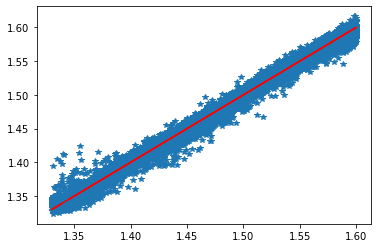

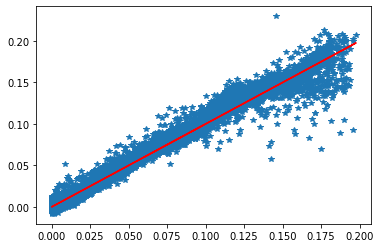

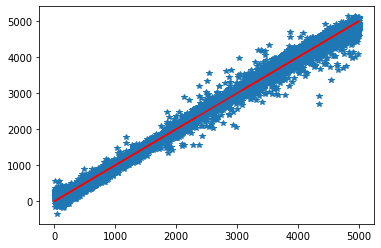

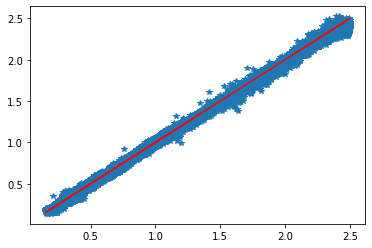

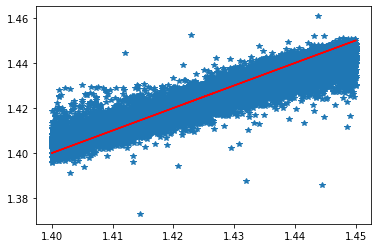

In [57]:

for col in qoi_pred.keys():
    plt.figure()
    plt.plot(qoi_test[col],qoi_pred[col],"*")
    plt.plot(qoi_test[col],qoi_test[col],'r')

In [52]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [56]:
for col in qoi_pred.keys():
    MAE = mean_absolute_error(qoi_test[col],qoi_pred[col])
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    print(col,'***',MAE,'***', col_mean,'***',col_p)

n_532nm *** 0.00533822082994102 *** 1.465051947232437 *** 0.3643707542265112
k_532nm *** 0.0045727426210741655 *** 0.06279689297082859 *** 7.281797561542365
V_tot *** 77.07200067049658 *** 2494.405197251391 *** 3.089794743669671
R_median *** 0.027533303534724093 *** 1.3258918229535237 *** 2.0765874755446934
GSD *** 0.0036572250619460447 *** 1.4250705106208217 *** 0.25663467419256336


In [55]:
for col in qoi_pred.keys():
    RMSE = np.sqrt(mean_squared_error(qoi_test[col],qoi_pred[col]))
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    print(col,'***',MAE,'***', col_mean,'***',col_p)

n_532nm *** 2.5117532751164327e-05 *** 1.465051947232437 *** 0.0017144465627046681
k_532nm *** 2.5117532751164327e-05 *** 0.06279689297082859 *** 0.039998050162819876
V_tot *** 2.5117532751164327e-05 *** 2494.405197251391 *** 1.0069547954294504e-06
R_median *** 2.5117532751164327e-05 *** 1.3258918229535237 *** 0.0018943877861176588
GSD *** 2.5117532751164327e-05 *** 1.4250705106208217 *** 0.0017625466644609785


In [54]:
for col in qoi_pred.keys():
    EVS = explained_variance_score(qoi_test[col],qoi_pred[col])
    print(col, EVS)

n_532nm 0.9920842482297076
k_532nm 0.9745331011545952
V_tot 0.99420357842543
R_median 0.9977444654736921
GSD 0.88452076145608


In [ ]:
mean_absolute_error()

# Calculate metrics

In [18]:
qoi_test.columns.values

array(['n_532nm', 'k_532nm', 'V_tot', 'R_median', 'GSD'], dtype=object)

In [19]:
res = qoi_test - qoi_pred

q = np.arange(0.1, 1.0, 0.05)
q = np.append(q, [0.98, 0.99])
q = np.round(q, decimals=3)
quantiles = res.abs().quantile(q)
quantiles.to_csv(f'{plot_dir}/forward_prediction_residual_quantiles_by_longitudinal_pos.csv', sep='\t')

In [20]:
metric = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj = metric.call(qoi_test.values, qoi_pred.values).numpy()
r2_adj = pd.Series(data=r2_adj, index=qoi_test.columns)
r2_adj = np.round(r2_adj, decimals=2)
r2_adj = pd.DataFrame(r2_adj).T

In [21]:
r2_adj = pd.DataFrame(r2_adj)

In [22]:
r2_adj

n_532nm  k_532nm  V_tot  R_median   GSD
0     0.99     0.97   0.99       1.0  0.88

In [23]:
min(r2_adj.min())

0.88

In [24]:
print(qoi_test)

        n_532nm   k_532nm        V_tot  R_median       GSD
75721  1.345160  0.060143  2315.678911  1.360143  1.422027
80184  1.560918  0.172217  1121.450456  0.871451  1.422156
19864  1.556752  0.179643  4962.553150  2.033473  1.405489
76699  1.331706  0.039514  4874.291655  0.258148  1.404925
92991  1.436442  0.118185  2536.972303  0.806500  1.444872
...         ...       ...          ...       ...       ...
32595  1.333477  0.047427  4764.529527  1.494872  1.414259
29313  1.468337  0.012928  3534.192530  1.835515  1.405211
37862  1.390257  0.042194  2015.697397  0.385029  1.430910
53421  1.563611  0.013500  3989.475902  1.355483  1.409619
42410  1.338385  0.098061  3102.600374  2.073354  1.426555

[20000 rows x 5 columns]


In [25]:
qoi_test = qoi_test.reset_index(drop = True)
qoi_test

n_532nm   k_532nm        V_tot  R_median       GSD
0      1.345160  0.060143  2315.678911  1.360143  1.422027
1      1.560918  0.172217  1121.450456  0.871451  1.422156
2      1.556752  0.179643  4962.553150  2.033473  1.405489
3      1.331706  0.039514  4874.291655  0.258148  1.404925
4      1.436442  0.118185  2536.972303  0.806500  1.444872
...         ...       ...          ...       ...       ...
19995  1.333477  0.047427  4764.529527  1.494872  1.414259
19996  1.468337  0.012928  3534.192530  1.835515  1.405211
19997  1.390257  0.042194  2015.697397  0.385029  1.430910
19998  1.563611  0.013500  3989.475902  1.355483  1.409619
19999  1.338385  0.098061  3102.600374  2.073354  1.426555

[20000 rows x 5 columns]

In [26]:
error = qoi_pred - qoi_test
error

n_532nm   k_532nm       V_tot  R_median       GSD
0     -0.003371 -0.002486  -12.715799 -0.040848 -0.005837
1     -0.012514 -0.002078  -17.882727 -0.028188  0.003335
2     -0.003336 -0.028187  -23.854460 -0.008662  0.001876
3      0.010261  0.018272  191.317466 -0.052183  0.002460
4     -0.001288  0.007206   72.844233  0.027313 -0.004452
...         ...       ...         ...       ...       ...
19995  0.006306  0.002949 -120.369716  0.002246  0.007047
19996 -0.020282 -0.001176   39.582887 -0.060870  0.000956
19997  0.004810  0.002884  -86.440257 -0.022816 -0.010903
19998 -0.006571  0.005354  -38.435279  0.015834  0.000149
19999  0.005132 -0.007214  -88.446286 -0.026896 -0.002435

[20000 rows x 5 columns]

In [27]:
rel_error = (qoi_test - qoi_pred) / qoi_test * 100.
rel_error = pd.DataFrame(rel_error, columns=qoi_test.columns).abs()
rel_error.reset_index(drop=True, inplace=True)
rel_error

n_532nm    k_532nm     V_tot   R_median       GSD
0      0.250622   4.132688  0.549118   3.003196  0.410437
1      0.801730   1.206655  1.594607   3.234570  0.234500
2      0.214318  15.690617  0.480689   0.425957  0.133485
3      0.770525  46.240987  3.925031  20.214274  0.175067
4      0.089699   6.097014  2.871306   3.386643  0.308097
...         ...        ...       ...        ...       ...
19995  0.472928   6.217542  2.526372   0.150226  0.498290
19996  1.381288   9.099436  1.119998   3.316245  0.068038
19997  0.345968   6.834868  4.288355   5.925805  0.761935
19998  0.420217  39.661179  0.963417   1.168177  0.010605
19999  0.383436   7.356461  2.850715   1.297223  0.170689

[20000 rows x 5 columns]

In [28]:
rel_error_table = np.round(rel_error.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [29]:
rel_error_table

n_532nm  k_532nm   V_tot  R_median   GSD
50%     0.29     6.50    2.52      1.90  0.19
75%     0.51    12.22    5.49      3.52  0.35
90%     0.76    23.86   15.04      7.13  0.56
95%     0.93    53.03   32.61     11.05  0.73
99%     1.45   310.21  218.33     20.91  1.12

In [30]:
rel_error_table.min(axis = 1)

50%    0.19
75%    0.35
90%    0.56
95%    0.73
99%    1.12
dtype: float64

In [31]:
rel_error_table.max(axis = 1)

50%      6.50
75%     12.22
90%     23.86
95%     53.03
99%    310.21
dtype: float64

# Save $\bar{R}^2$

In [32]:
#r2_adj.to_latex(f'{plot_dir}/r2_table.tex', index=False, escape=False)

In [33]:
r2_adj_T = r2_adj.T
r2_adj_T=r2_adj_T.rename(columns={0: "r2_adj"})
r2_adj_T

r2_adj
n_532nm     0.99
k_532nm     0.97
V_tot       0.99
R_median    1.00
GSD         0.88

# Plot

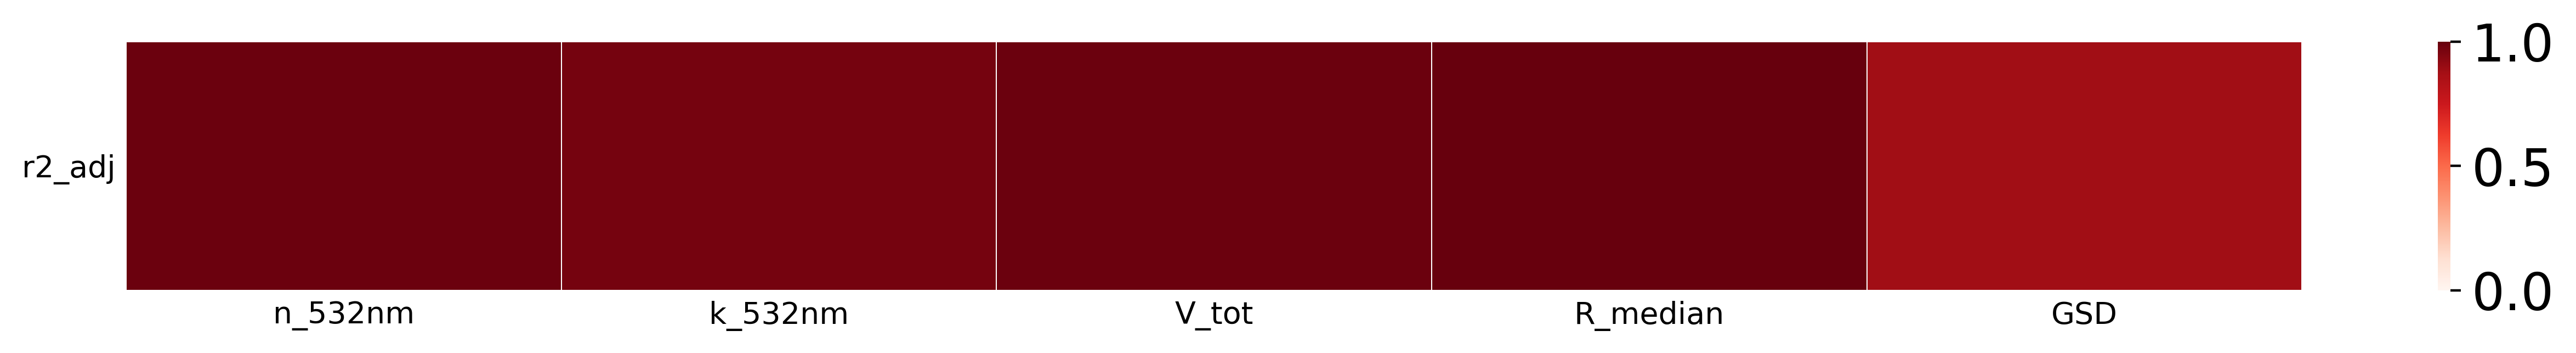

In [34]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(pd.DataFrame(r2_adj_T, columns = ['r2_adj']).T,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_model_r2_adj.jpg')


## Relative Errors

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table,
            cmap='Reds',
            #annot=True,
            linewidths=0.02,
            vmin=0.,
            vmax=np.max(rel_error_table.max()),
            #annot_kws={'fontsize': 10},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=10);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/isodar_forward_rel_error_percentiles.jpg')

## DVARs vs. percentage errors

In [ ]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi_test.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/percentage_error_vs_{design_var}.jpg')
    
    return fig

In [ ]:
qoi_test.columns[0:11]

In [ ]:
for d in dvar_test.columns:
    plot_error_vs_dvar(d)

## Correlations between DVARs and QOIs

In [ ]:
combined = pd.concat([dvar_test, rel_error], axis=1)

In [ ]:
corr = np.round(combined.corr(), decimals=2)

In [ ]:
to_plot = corr.copy()
to_plot.drop(columns=dvar_test.columns, inplace=True)
#to_plot.rename(columns=qoi.columns, index=qoi.columns.values, inplace=True)

In [ ]:
qoi_test.columns

In [ ]:
to_plot = to_plot.drop(qoi_test.columns, axis =0)

In [ ]:
to_plot

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
            linewidths=0.01,
           # annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/rel_error_correlations.jpg')

## Residuals

In [ ]:
error


In [ ]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in qoi_test.columns[0:3]:
    sns.distplot(error[col], ax=ax)
ax.text(x=-0.025,
        y=5,
        color=colors[0],
        s=r'$phase_0.0$',
        fontsize=30)
ax.text(x=0.015,
        y=3,
        color=colors[1],
        s=r'$phase_1.0$',
        fontsize=30)
ax.text(x=0.01,
        y=4,
        color=colors[2],
        s=r'$phase_2.0$',
        fontsize=30)
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/residual_distr_sigma.jpg')

colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in qoi.columns:
    sns.distplot(error[col], ax=ax)
#ax.text(x=-0.025,
#        y=15,
#        color=colors[0],
#        s=r'$\sigma_x$',
#        fontsize=30)
#ax.text(x=0.015,
#        y=30,
#        color=colors[1],
#        s=r'$\sigma_y$',
#        fontsize=30)
#ax.text(x=0.01,
#        y=40,
#        color=colors[2],
#        s=r'$\sigma_z$',
#        fontsize=30)
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/residual_distr_sigma.jpg')

In [ ]:
def standardise(x):
    return (x - x.mean()) / x.std()

In [ ]:
for i, col in enumerate(qoi_test.columns[0:11]):
    print(i)
    print(col)

In [ ]:
fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi_test.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error[col]), dist="norm", plot=ax);
#    ax.set_title(qoi.columns[col], fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
fig.savefig(f'{plot_dir}/residual_normality_plots.jpg')

In [ ]:
# pd.DataFrame({'Mean': error.mean(axis=0), 'std': error.std(axis=0)})

In [ ]:
rel_error.abs().quantile(0.9)

In [ ]:
qoi_columns = qoi_test.columns

In [ ]:
statistic, p = scipy.stats.shapiro(standardise(error[qoi_test.columns[0]]).values)

In [ ]:
statistic

In [ ]:
p

In [ ]:
surr.model.summary()

In [ ]:
qoi_pred

In [ ]:
test_index = qoi_test.index.tolist()
test_index

In [ ]:
presentation_plot_index = [0,1,3,4,5,6]

qoi_test.index.values

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for index in qoi_test.index.values:
    ax.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title('GSD=1.5, RI_n=1.5, RI_k=0.005',fontsize = 25)
#fig.align_labels()
ax.legend(loc='upper right', shadow=True,title='GMD', fontsize=16)
ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_all.jpg')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    plot_test_data = ax.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = ax.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.legend(loc='upper right', shadow=True,title='GMD', fontsize=16)
ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result.jpg')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for index in qoi_test.index.values:
    ax.plot(qoi_test.iloc[index],qoi_pred.iloc[index],'b*')
    
    #plt.yscale('logit')
    
    
ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 

ax.axline([-25, -25], [-8, -8])


#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation.jpg')

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
plot_dir

In [ ]:
plot_model(surr.model, show_shapes=True,show_layer_names=True, to_file = f'{plot_dir}/model_architecture.png')


In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(pd.DataFrame(r2_adj_T, columns = ['r2_adj']).T,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_forward_model.jpg')
